In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis - Global Terrorism**.

In [9]:
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import animation
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
file_path = '/content/drive/MyDrive/Colab Notebooks/CSV files/globalterrorismdb_0718dist.csv'

In [14]:
# Read the CSV file into a DataFrame with the 'ISO-8859-1' encoding
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the DataFrame to check the data
df.head()

<ipython-input-14-9c793cff6a33>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 136 entries, eventid to ncasualties
dtypes: float64(56), int64(22), object(58)
memory usage: 188.5+ MB


In [16]:
print ('dataframe shape: ', df.shape)

dataframe shape:  (181691, 135)


In [17]:
print ('Existance of nul values', df.isnull().values.any())
print ('Total number of null values in entire dataframe: ', df.isnull().sum().sum())

Existance of nul values True
Total number of null values in entire dataframe:  13853997


In [18]:
print ('Number of null values in named col of dataframe: ', df.isnull().sum())

Number of null values in named col of dataframe:  eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


**Changing the content and features of the data**

Renaming certain columns to better identifiable name in the data frame



In [19]:
df.rename(columns =
                  {'iyear':'year',
                   'imonth':'month',
                   'iday':'day',
                   'country_txt' : 'country',
                   'region_txt' : 'region',
                   'crit1' : 'crit',
                   'attacktype1_txt' : 'attacktype',
                   'targtype1_txt' : 'targettype',
                   'natlty1_txt' : 'nationalityofvic',
                   'gname' : 'organisation',
                   'claimed' : 'claimedresp',
                   'weaptype1_txt' : 'weapontype',
                   'nkill' : 'nkilled',
                   'nkillter' : 'nkillonlyter',
                   'nwound' : 'nwounded',
                   'propextent_txt' : 'propdamageextent',
                   'ishostkid' : 'victimkidnapped',
                   'ransom' : 'ransomdemanded',
                   }, inplace = True)


In [20]:
#Add column ncasualties (Number of Dead/Injured people) by adding Nkill and Nwound
df['ncasualties'] = df['nkilled'] + df['nwounded']

In [21]:
# Limit long strings
df['weapontype'] = df['weapontype'].replace(u'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')

df['propdamageextent'] = df['propdamageextent'].replace('Minor (likely < $1 million)', 'Minor')
df['propdamageextent'] = df['propdamageextent'].replace('Major (likely > 1 billion)', 'Major')
df['propdamageextent'] = df['propdamageextent'].replace('Catastrophic (likely > $1 billion)', 'Catastrophic')


In [22]:
df.head(10)

,eventid,year,month,day,approxdate,extended,resolution,country,country,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,ncasualties
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN,0.0
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,0.0
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN,0.0
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN,0.0
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN,0.0


In [23]:
print ('final dataframe shape: ', df.shape)

final dataframe shape:  (181691, 136)


In [24]:
#Check for general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 136 entries, eventid to ncasualties
dtypes: float64(56), int64(22), object(58)
memory usage: 188.5+ MB


**Cleaned Data**

In [25]:
# Converting the dataframe to a csv file and upload with the name BaseForAnalysis_Version2.csv
df.to_csv("BaseForAnalysis_Version2.csv", sep = ",")

**DATA ANALYSIS AND VISUALISATION**

In [26]:
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import animation
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import plotly.express as px

In [27]:
pf=pd.read_csv('BaseForAnalysis_Version2.csv')

<ipython-input-27-d9babfb96405>:1: DtypeWarning: Columns (5,7,32,34,62,63,64,77,80,91,93,95,97,115,116,122) have mixed types. Specify dtype option on import or set low_memory=False.
  pf=pd.read_csv('BaseForAnalysis_Version2.csv')


In [28]:
pf.head()

,Unnamed: 0,eventid,year,month,day,approxdate,extended,resolution,country,country.1,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,ncasualties
0,0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0
1,1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0
2,2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0
3,3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN
4,4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN


In [29]:
pf.columns

Index(['Unnamed: 0', 'eventid', 'year', 'month', 'day', 'approxdate',
       'extended', 'resolution', 'country', 'country.1',
       ...
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY', 'related', 'ncasualties'],
      dtype='object', length=137)

In [30]:
pf.rename(columns= { 'nkilled':'Killed','nwounded':'Wounded','nreleased':'Released','Weapontype':'Weapon Type',
                    'ncasualties':'Casualties','nationalityofvic':'Nationality of Vic','targettype':'Targettype',
                    'victimkidnapped':'Victim Kidnapped','ransomdemanded':'Randsom Demanded','attacktype':'Attacktype'},inplace=True)
pf.columns

Index(['Unnamed: 0', 'eventid', 'year', 'month', 'day', 'approxdate',
       'extended', 'resolution', 'country', 'country.1',
       ...
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY', 'related', 'Casualties'],
      dtype='object', length=137)

**Analysis of the numerical figures in the data frame**

In [31]:
pf[['Killed', 'nkillonlyter', 'Wounded', 'propdamageextent',
        'Casualties']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Killed,171378.0,2.403272,11.545741,0.0,0.0,0.0,2.0,1570.0
nkillonlyter,114733.0,0.508058,4.199937,0.0,0.0,0.0,0.0,500.0
Wounded,165380.0,3.167668,35.949392,0.0,0.0,0.0,2.0,8191.0
Casualties,164817.0,5.296128,42.069023,0.0,0.0,1.0,4.0,9574.0


In [32]:
pf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 137 columns):
 #    Column              Dtype  
---   ------              -----  
 0    Unnamed: 0          int64  
 1    eventid             int64  
 2    year                int64  
 3    month               int64  
 4    day                 int64  
 5    approxdate          object 
 6    extended            int64  
 7    resolution          object 
 8    country             int64  
 9    country.1           object 
 10   region              int64  
 11   region.1            object 
 12   provstate           object 
 13   city                object 
 14   latitude            float64
 15   longitude           float64
 16   specificity         float64
 17   vicinity            int64  
 18   location            object 
 19   summary             object 
 20   crit                int64  
 21   crit2               int64  
 22   crit3               int64  
 23   doubtterr           float64
 24 

**Analysis of the number of attacks per year**

Text(0.5, 1.0, 'Number of Terrorist Attack by Year')

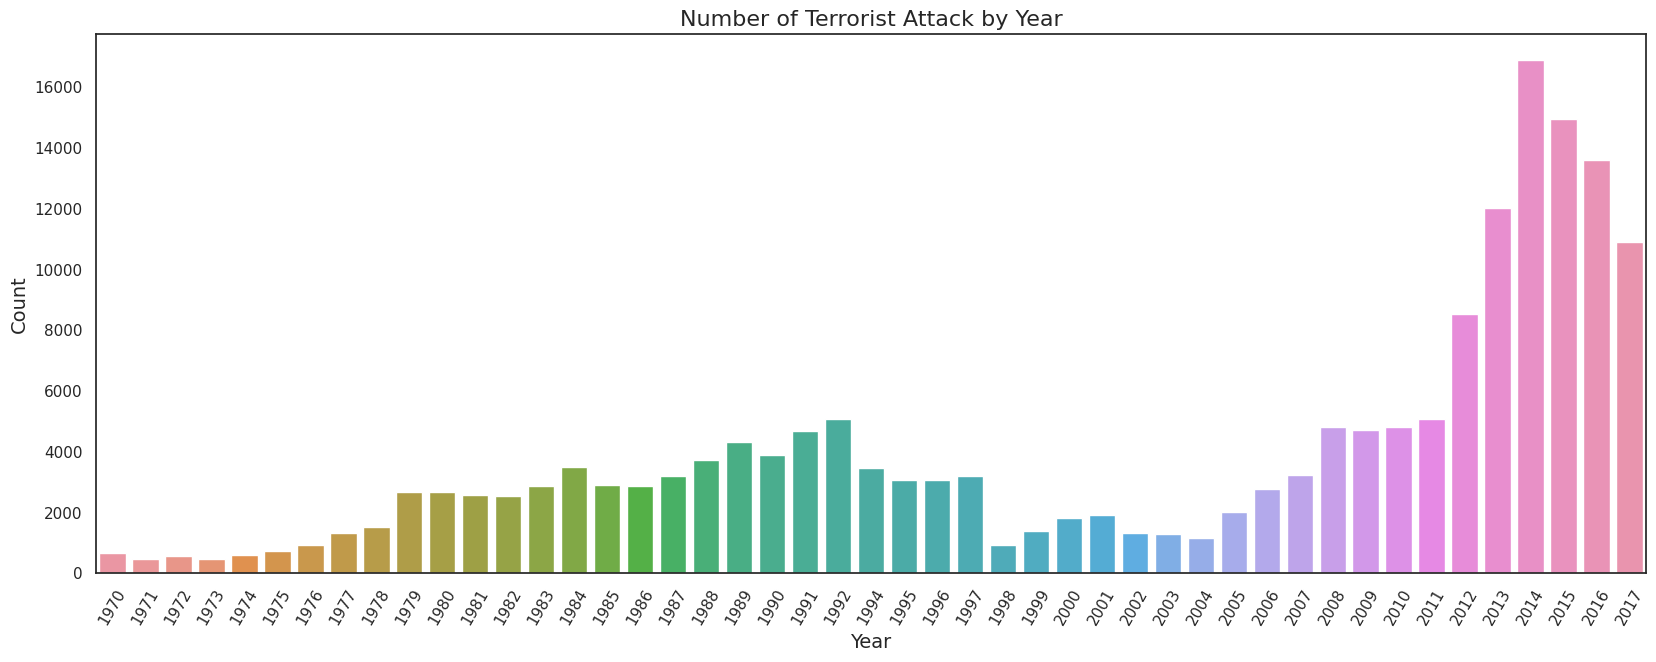

In [33]:
f = plt.figure(figsize=(20, 7))

sns.set(font_scale = 1.1)
sns.set_theme(style="white", palette=None)
xaxis = sns.countplot(x = 'year', data = pf)
xaxis.set_xticklabels(xaxis.get_xticklabels(), rotation=60)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Number of Terrorist Attack by Year', fontsize = 16)

**Methods of Terriorst Attack**

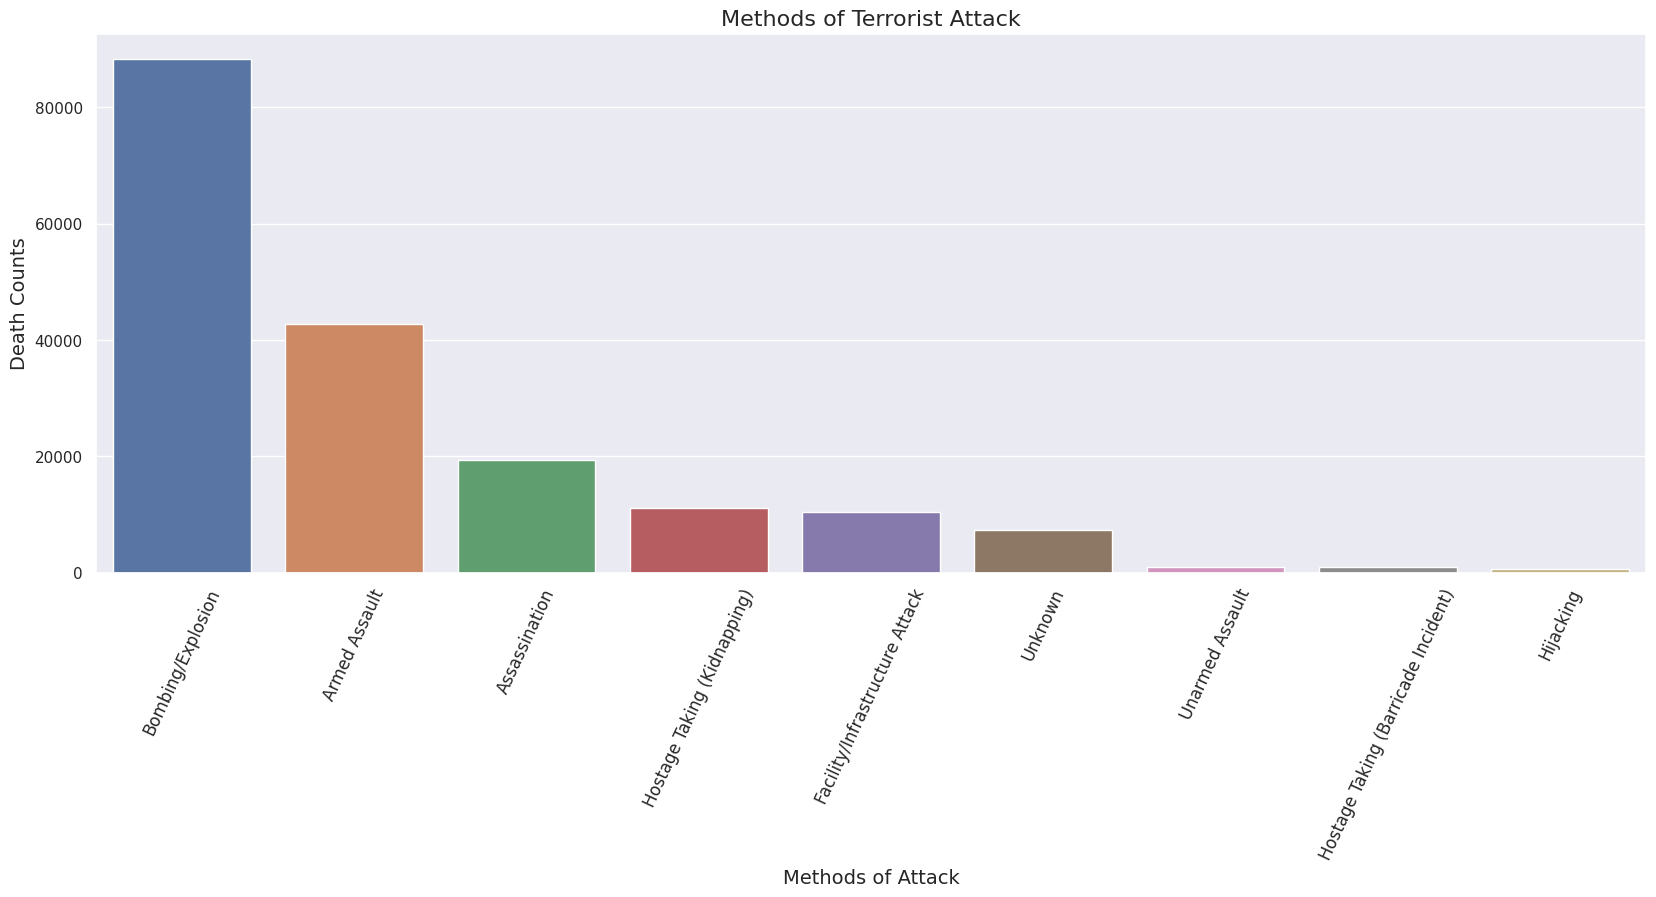

In [34]:
plt.figure(figsize=(20, 7))
sns.set(font_scale=1.0)

attack_type_counts = pf['Attacktype'].value_counts()

sns.barplot(x=attack_type_counts.index, y=attack_type_counts.values)
plt.xlabel('Methods of Attack', fontsize=14)
plt.ylabel('Death Counts', fontsize=14)
plt.title('Methods of Terrorist Attack', fontsize=16)
plt.xticks(rotation=65, fontsize=12)

plt.show()

**Most Attcaked Target Types**

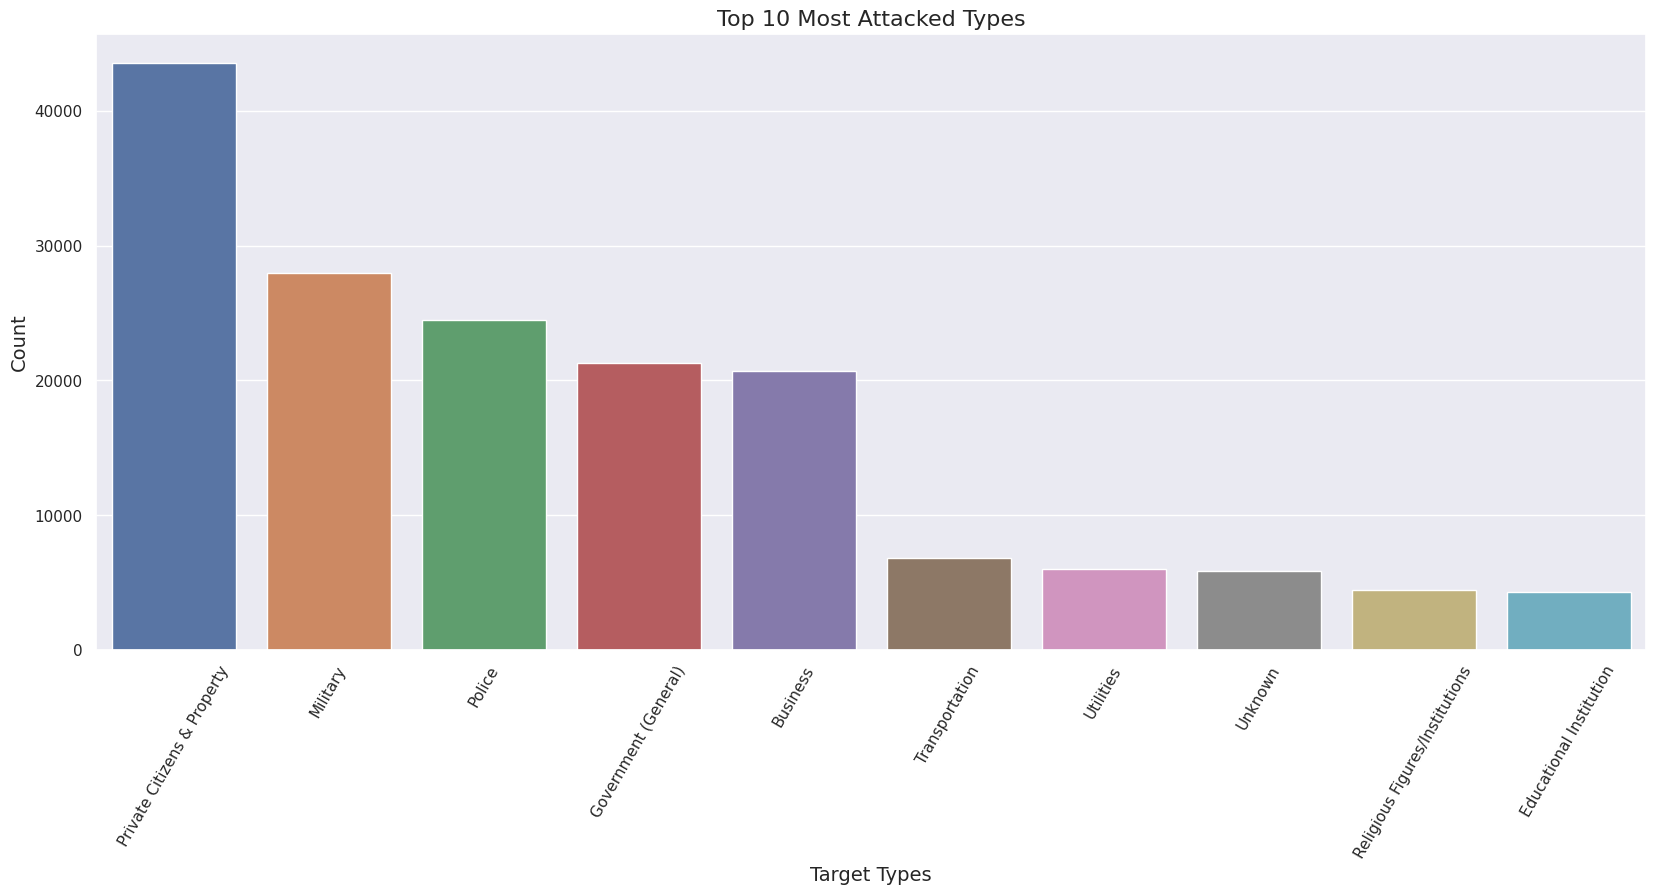

In [37]:
f = plt.figure(figsize=(20, 8))
sns.set(font_scale=1.0)

top_10_targets = df['targettype'].value_counts().nlargest(10).index

xaxis = sns.countplot(x='targettype', data=df, order=top_10_targets)
xaxis.set_xticklabels(xaxis.get_xticklabels(), rotation=60)

plt.xlabel('Target Types', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top 10 Most Attacked Types', fontsize=16)
plt.show()

**Most attacks Cities in the World**

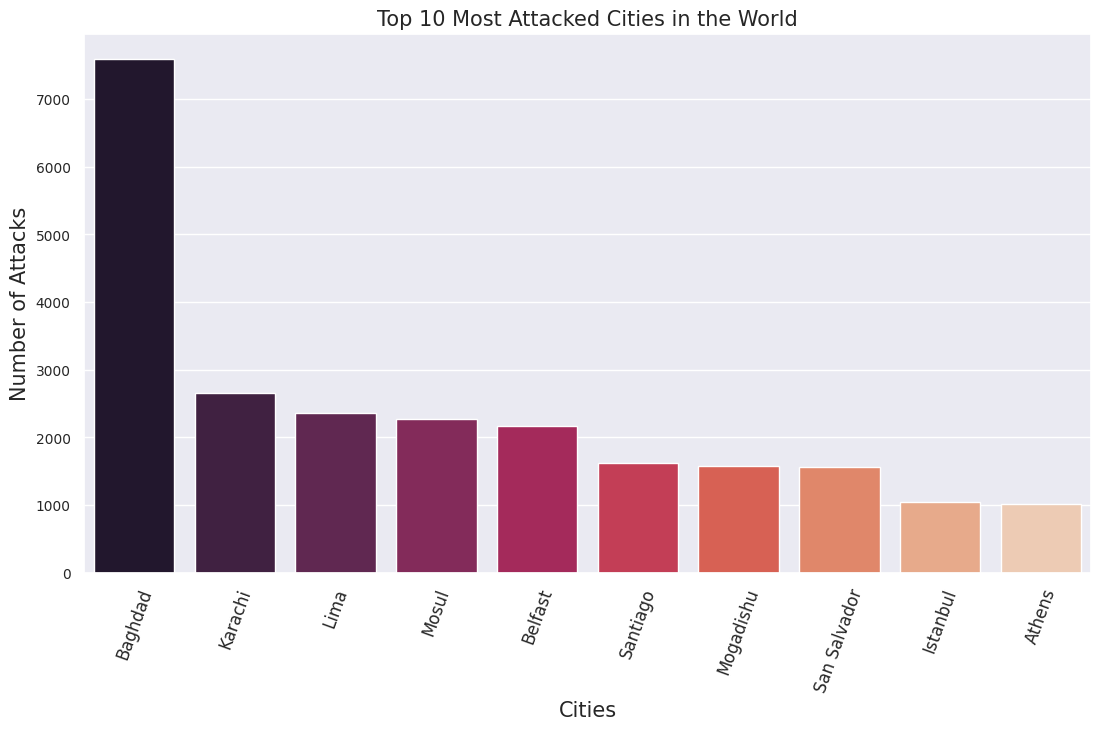

In [40]:
plt.figure(figsize=(13, 7))
top_10_cities = pf['city'].value_counts().head(11)  # Increase head count by 1 to include Unknown

# Remove 'Unknown' from top cities
top_10_cities = top_10_cities[top_10_cities.index != 'Unknown']

sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette='rocket')
plt.title('Top 10 Most Attacked Cities in the World', fontsize=15)
plt.xlabel('Cities', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)
plt.xticks(rotation=70, fontsize=12)

plt.show()


**Most Used weapon types in Terror Attacks**

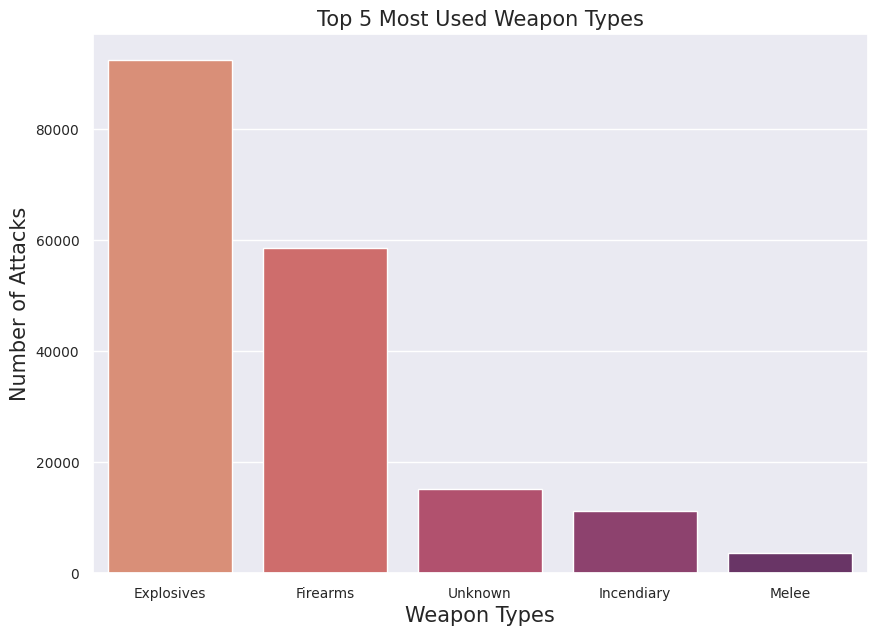

In [41]:
# Top 5 most used weapons types in terror attacks
plt.figure(figsize=(10, 7))
top_5_weapon_types = pf['weapontype'].value_counts().head()

sns.barplot(x=top_5_weapon_types.index, y=top_5_weapon_types.values, palette='flare')
plt.title('Top 5 Most Used Weapon Types', fontsize=15)
plt.xlabel('Weapon Types', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)
plt.show()

**Exploring terror attacks by different terrorist organizations**

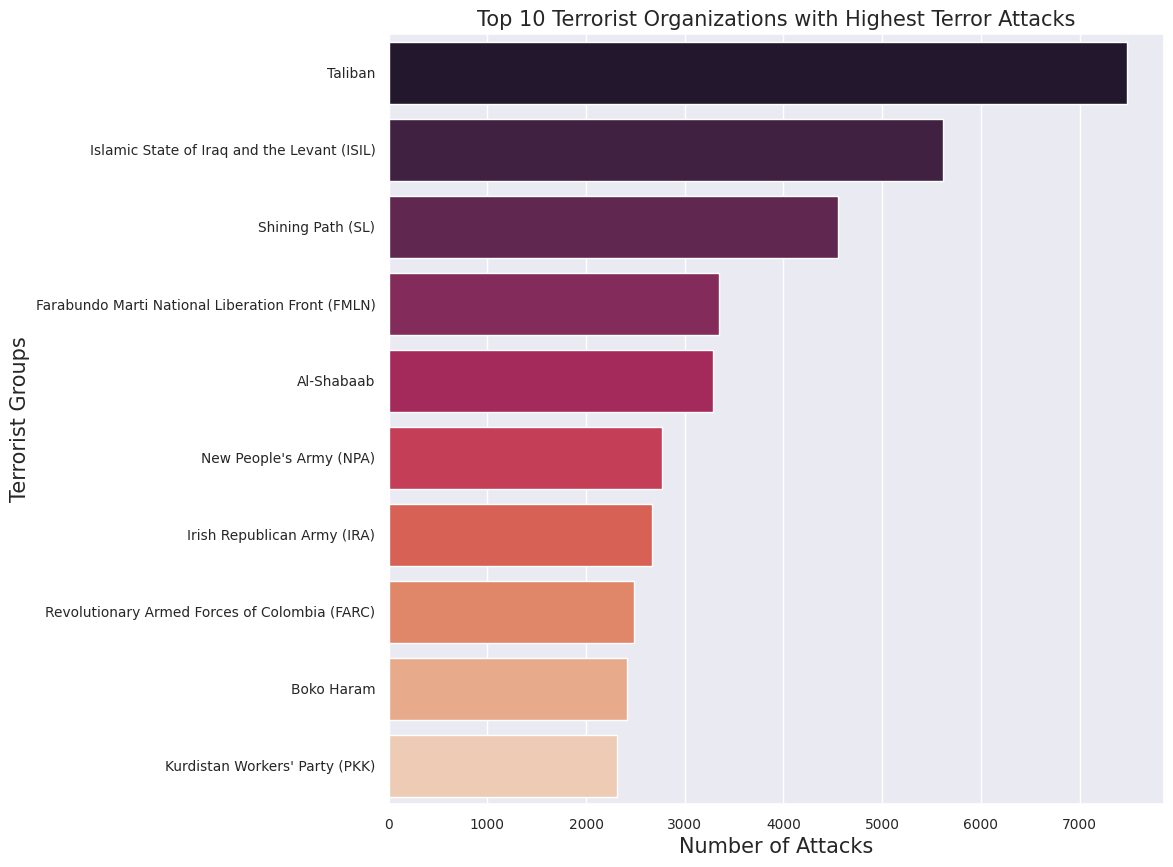

In [42]:
plt.figure(figsize=(10, 10))
top_10_organizations = pf['organisation'].value_counts().head(11)
top_10_organizations = top_10_organizations[top_10_organizations.index != 'Unknown']

sns.barplot(x=top_10_organizations.values, y=top_10_organizations.index, palette='rocket')
plt.title('Top 10 Terrorist Organizations with Highest Terror Attacks', fontsize=15)
plt.xlabel('Number of Attacks', fontsize=15)
plt.ylabel('Terrorist Groups', fontsize=15)

plt.show()


**Lets have a closer look at Taliban**

In [43]:
# creating a separate dataframe for Taliban
pf_tal = pf[pf['organisation'] == 'Taliban']
pf.columns

Index(['Unnamed: 0', 'eventid', 'year', 'month', 'day', 'approxdate',
       'extended', 'resolution', 'country', 'country.1',
       ...
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY', 'related', 'Casualties'],
      dtype='object', length=137)

**Attacks by Taliban over the years**

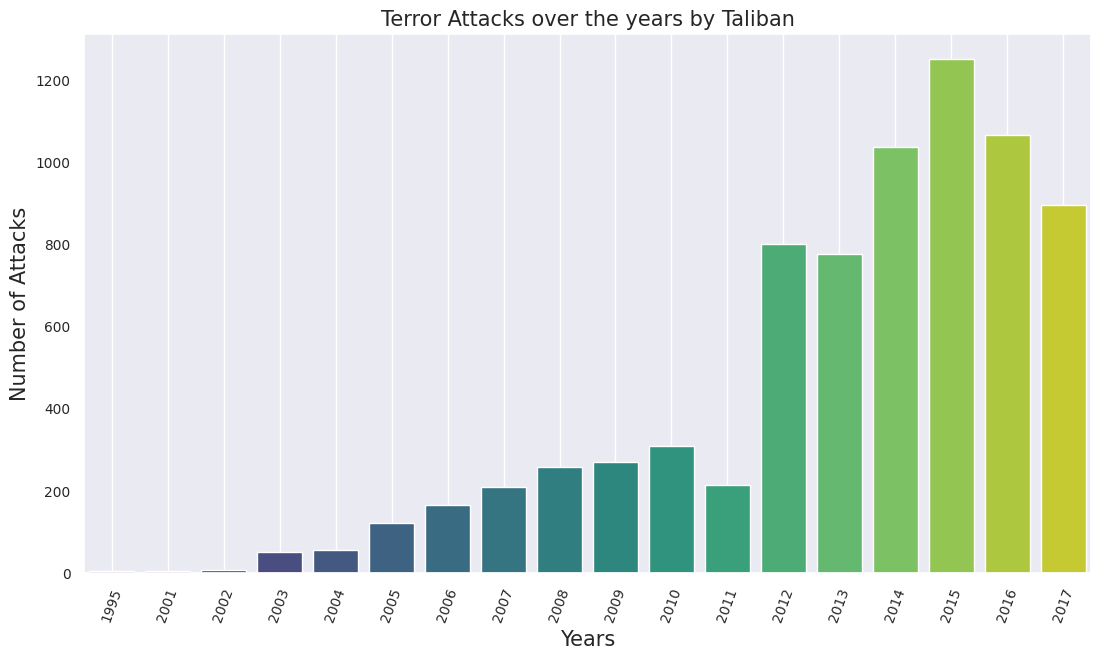

In [44]:
# Terror Attacks by Taliban over the Years
plt.figure(figsize=(13, 7))
sns.barplot(x=pf_tal['year'].value_counts().index, y=pf_tal['year'].value_counts().values, palette='viridis')
plt.title('Terror Attacks over the years by Taliban', fontsize=15)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)
plt.xticks(rotation=70)
plt.grid()
plt.show()

*Sudden increase in attacks by Taliban can be seen from 2012 and it has peaked during 2015.*

**Analysis of number of attacks in a region on a particular calender year**

*This helps us compare the rise / fall of attacks on a region*

In [46]:
region_year = pd.crosstab(pf.year, pf.region)

region_year.head(20)

region,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1970,472,7,65,2,10,1,0,50,12,28,3,1
1971,247,5,24,1,6,0,0,125,5,55,2,1
1972,73,3,33,0,16,1,0,376,1,53,4,8
1973,64,6,83,2,2,1,0,290,1,19,4,1
1974,111,11,81,4,3,2,0,317,2,42,7,1
1975,159,9,55,12,7,4,0,438,0,44,12,0
1976,125,45,91,2,12,4,0,578,0,55,11,0
1977,149,24,119,4,8,2,0,771,2,211,29,0
1978,117,199,222,35,44,2,0,729,2,128,46,2


Text(0.5, 1.0, 'Number of Attacks per Region by Year')

<Figure size 1600x1000 with 0 Axes>

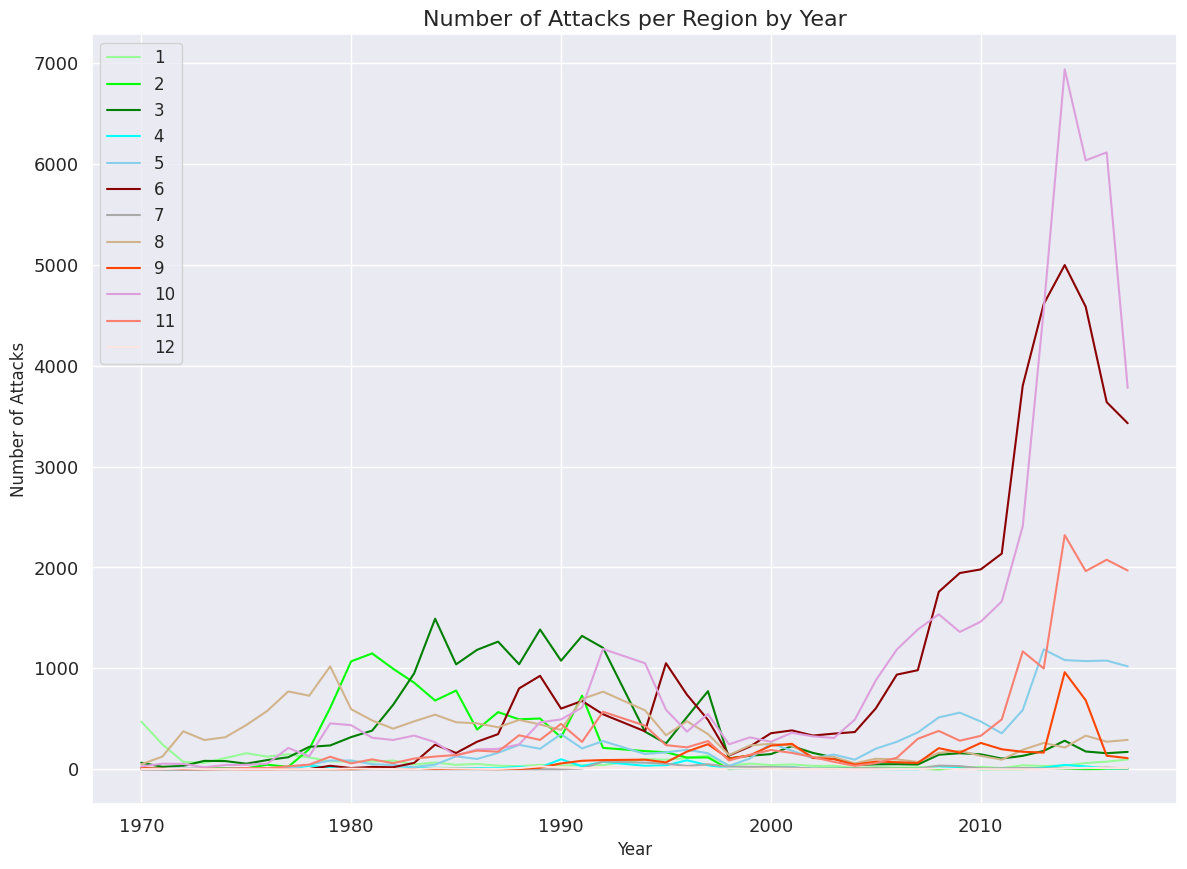

In [47]:
fig = plt.figure(figsize=(16, 10))

color_list_reg_yr = ['palegreen', 'lime', 'green', 'aqua', 'skyblue', 'darkred', 'darkgray', 'tan',
                     'orangered', 'plum', 'salmon', 'mistyrose', 'gold', 'teal', 'violet', 'coral', 'seagreen']
region_year.plot(figsize=(14, 10), fontsize=13, color=color_list_reg_yr)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.legend(fontsize=12)
plt.title('Number of Attacks per Region by Year', fontsize=16)

In [ ]:
attacktype_year = pd.crosstab(pf.year, pf.Attacktype)

attacktype_year.head(20)

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
year,,,,,,,,,
1970,61,22,333,174,11,3,38,3,6
1971,44,70,239,88,6,1,20,0,3
1972,63,265,188,19,12,4,16,0,1
1973,62,164,149,36,8,7,43,3,1
1974,46,158,285,42,3,5,37,4,1
1975,81,181,370,64,1,13,27,0,3
1976,124,204,419,113,4,6,45,3,5
1977,254,146,635,182,7,14,67,0,14
1978,241,263,644,181,0,43,97,5,52


# Results of Analysis:

## Insights from Exploratory Data Analysis:

1. Most of the attacks were carried out using explosives, followed by firearms.
2. There was a peak in attacks in 2014 and 2015, with an average of 45 attacks per day. The last six years have seen a significant increase in attacks compared to previous years.
3. Iraq had the highest number of attacks, followed by Pakistan, Afghanistan, and India.
4. Baghdad was the most affected city and state.
5. The Middle East & North Africa region had the highest number of attacks, followed by South Asia.
6. Private citizens and property were the most common targets, followed by the military.
7. The majority of attacks involved bombings or explosions.
8. The Taliban became more active starting in 2012 and has been responsible for most terror attacks.

## Measures to Reduce Terrorism:

1. Implement stricter controls on access to dangerous weapons.
2. Increase surveillance, particularly in the Middle East & North African regions.
3. Enforce strict border policies to prevent the movement of explosives between regions.
4. Implement measures to address increased immigration.